In [2]:
import numpy as np
import astroplan
from astroplan import plots
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
%matplotlib 

Using matplotlib backend: Qt5Agg


# DEIMOS:

In [78]:
from astropy.io import ascii as asc, fits
from utilities_az import spectroscopy as spec

In [42]:
GG400 = asc.read('GG400_5500_600ZD.txt')
OG550 = asc.read('OG550_7500_600ZD.txt')
GG455 = asc.read('GG455_6500_600ZD.txt')

In [88]:
spec_17cq = fits.getdata('DLT17cq_20180812_2458343.01612_1.fits', 1)
spec_18is = fits.getdata('2018is_20190205_2458520.07207_1.fits', 1)
spec_18aoq = fits.getdata('2018aoq_20181205_2458458.13273_1.fits', 1)
ofile = fits.open('AT2019krl_Bino.fits')
flux_19krl = ofile[0].data/1E-15
wave_19krl = spec.calc_wavelength(ofile[0].header, np.arange(len(flux_19krl)))

In [ ]:
Important Lines

### Line profile shape (velocity distribution and mixing)
* Ha
* [OI] 6300, 6364
* [CaII] 7291, 7323
* [FeII] 7155, 7172

In [91]:
fig = plt.figure()
plt.plot(flux_19krl)

In [133]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()
ax.plot(GG400['wav'], GG400['eff'], label='GG400 cenwave=5500')
ax.plot(GG455['wav'], GG455['eff'], label='GG455 cenwave=7500')
ax.plot(OG550['wav'], OG550['eff'], label='OG550 cenwave=6500')

ax2.plot(spec_17cq['wave'], spec_17cq['flux'], label='17cq', color='C3')
ax2.plot(spec_18is['wave'], spec_18is['flux'], label='18is', color='C4')
ax2.plot(spec_18aoq['wave'], spec_18aoq['flux'], label='18aoq', color='C5')
#ax2.plot(wave_19krl, flux_19krl, label='19krl', color='C6')

ax2.annotate('MgI] 4571', (4571, 9E-16), rotation=90, xytext=(4571, 9E-16)   ,ha='center')
ax2.annotate('[OI] 6300', (6300, 9E-16), rotation=90, xytext=(6300, 9E-16)   ,ha='center')
ax2.annotate('Ha 6563', (6563, 9E-16), rotation=90, xytext=(6563, 9E-16)     ,ha='center')
ax2.annotate('[CaII] 7291', (7291, 9E-16), rotation=90, xytext=(7291, 9E-16) ,ha='center')
ax2.annotate('CaII 8662', (8662, 9E-16), rotation=90, xytext=(8662, 9E-16) ,ha='center')

ax2.vlines([4571,6300, 6563, 7291, 8662], ymin=5E-16, ymax=7E-16, linestyle=':' )

ax.axvline(5500, color='C0', ls='--')
ax.axvline(7500, color='C2', ls='--')
ax.axvline(6500, color='C1', ls='--')

ax.legend(loc=6, fontsize='x-small')
ax2.legend(loc=2, fontsize='x-small')
ax.set_xlim(xmin=2000)

ax2.set_ylim(-1E-16, 10E-16)
plt.savefig('deimos_tp_typeII.pdf')

/Users/bostroem/anaconda/envs/astroconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:3116: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


In [54]:
plt.annotate?

# Plan

In [2]:
astroplan.download_IERS_A()

In [3]:
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)
#plt.rcParams['axes.prop_cycle'] = custom_cycler
#plt.rc('axes', prop_cycle=custom_cycler)

for d in colors:
    print(d)

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf


In [4]:
observer = astroplan.Observer.at_site('keck')


In [5]:
today = Time('2019-08-27 08:45:00', scale='utc')


In [6]:
twi12deg = observer.twilight_morning_nautical(today)
print(twi12deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print(twi18deg.iso)

pre_twi18deg = observer.twilight_evening_astronomical(today)

twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print(twi15deg.iso)

handoff = Time('2019-08-27 10:24:00', scale='utc')

2019-08-27 15:16:29.712
2019-08-27 14:49:50.508
2019-08-27 15:03:13.170


#### Standards

In [17]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)

HZ4           = astroplan.FixedTarget(coord=SkyCoord('03:55:21.7','+09:47:18',unit=(u.hourangle, u.degree)),
                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2

In [18]:
stds = [gd71, BD284211, BD174708, HD19445, G191B2B, HD84937, Feige34, HZ44, BD262606, BD33d2642, 
        Feige110, Feige66, HZ4,PG0205134, Feige11, Hiltner600 ]

#### Choose Standards for the night

In [19]:
from astropy.utils.iers import conf
conf.auto_max_age = None
time = today+np.linspace(0, 0.32, 100)
plt.figure()
for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle)
plt.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(twi18deg.plot_date, label='18deg', color='k')
plt.axvline(handoff.plot_date, label='handoff', color='k')
plt.legend(ncol=3, loc='lower center')
plt.grid()

In [210]:
istyle

{'color': '#2ca02c', 'linestyle': '-'}

In [105]:
chosen_stds = [Feige110, HD19445]

#### Targets

In [146]:

sn2017gmr = astroplan.FixedTarget(coord=SkyCoord('02:35:30.15', '-09:21:15.0', unit=(u.hourangle, u.degree)),
                                  name='2017gmr')
sn2019krl = astroplan.FixedTarget(coord=SkyCoord('01:36:49.63', '+15:46:46.1', unit=(u.hourangle, u.degree)),
                                  name='2019krl')
sn2018gjx = astroplan.FixedTarget(coord=SkyCoord('02:16:15.55', '+28:35:28.7', unit=(u.hourangle, u.degree)),
                                  name='2018gjx')
sn2018ivc = astroplan.FixedTarget(coord=SkyCoord('02:42:41.29', '-00:00:31.8', unit=(u.hourangle, u.degree)),
                                  name='2018ivc')

sn2017eaw = astroplan.FixedTarget(coord=SkyCoord('20:34:44.24',  '+60:11:35.9', unit=(u.hourangle, u.degree)),
                                                 name='2017eaw')
sn2018eog = astroplan.FixedTarget(coord=SkyCoord( '20:28:12.03',  '-03:08:11.2', unit=(u.hourangle, u.degree)),
                                                  name='2018eog')
sn2018evy = astroplan.FixedTarget(coord=SkyCoord('18:22:38.17',  '+15:41:47.6', unit=(u.hourangle, u.degree)),
                                 name='2018evy')

sn2018zd = astroplan.FixedTarget(coord=SkyCoord('06:18:03.18' '+78:22:00.9', unit=(u.hourangle, u.degree)),
                                name='2018zd')

In [147]:
targets = [sn2017gmr, sn2019krl, sn2018gjx, sn2018ivc, sn2017eaw, sn2018eog, sn2018evy, sn2018zd]

#### Plot Objects for the night

In [26]:

plt.close()
fig = plt.figure()
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
time = today+np.linspace(-0.2, 0.32, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility.pdf')

In [ ]:
Want to do 2-3 exposures - CR are an issue
Blue side is significantly fainter than red side
5500-8500 is where throughput is optimized. If want higher S/N blueward of 5500, then need to increase exposure time
Move hour to 45 min, keep an hour if we want to be safe
wavelength coverage 2600 on either side of detector gap

Arcs: Ne Ar Kr Xe 1s red side
    Cd Zn Mercury 3s blue side
    Cd Zn 12s blue side
    
    7200 and 7900 central wavelength
Flat: 3x6s

# Make a schedule

2018acj  13:48:40.63 +43:25:04.7   22-23  4x1200   
2018yu   05:22:32.36 -11:29:13.8   21.5   2x1200

In [28]:
tab = """BD174708 22:11:31.37 +18:05:34.2   9.2 1x10
2018eog  20:28:12.03 -03:08:11.2   22.5      3x1200
2017gmr  02:35:30.15 -09:21:15.0   22        3x800
2019krl  01:36:49.63 +15:46:46.1   21        3x400
2018ivc  02:42:41.29 -00:00:31.8   22        3x1200
2018zd   06:18:03.18 +78:22:00.9   22        3x800
Hiltner600 06:45:13.40 +02:08:14.1 10.45     1x30
HD19445  03:08:25.86 +26:20:05.7    7.8   1x10"""  
#2018gjx  02:16:15.55 +28:35:28.7   22.5?      3x1200
#2018evy  18:22:38.17 +15:41:47.6   20      1x900
#G191B2B  05:05:30.60 +52:49:54.00  11.9   1x60
#Feige110     23:19:58.39  -05:09:55.8   12     1x60

In [29]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [30]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [31]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
BD174708,22:11:31.37,+18:05:34.2,9.2,1x10,1.0,10.0
2018eog,20:28:12.03,-03:08:11.2,22.5,3x1200,3.0,1200.0
2017gmr,02:35:30.15,-09:21:15.0,22,3x800,3.0,800.0
2019krl,01:36:49.63,+15:46:46.1,21,3x400,3.0,400.0
2018ivc,02:42:41.29,-00:00:31.8,22,3x1200,3.0,1200.0
2018zd,06:18:03.18,+78:22:00.9,22,3x800,3.0,800.0
Hiltner600,06:45:13.40,+02:08:14.1,10.45,1x30,1.0,30.0
HD19445,03:08:25.86,+26:20:05.7,7.8,1x10,1.0,10.0


In [32]:
night_start = handoff
readout_time = 127*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
tbdata['start'] = obs_start[:-1]

In [33]:
tbdata.write('../plan.txt', format='ascii.fixed_width', overwrite=True)

In [34]:
fig = plt.figure()
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='k', ls='--', label='Keck II setting target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='gray', ls='--', label='Keck II rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(twi12deg-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
ax.axvline(twi15deg.plot_date, color='gray', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule.pdf')

/Users/bostroem/anaconda/envs/astroconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


# Backup targets:

2018hmx  08:33:39.34 +55:35:53.0  18.5    2x600

In [22]:
backup_tab = '''HD84937  09:48:56.09 +13:44:39.3   8.3    1x10
placeholder 00:00:00.00 00:00:00.0 99     1x3600
2018is   13:16:57.35 -16:37:04.4   22     7x1200
2018aoz  11:51:01.79 -28:44:38.4   20     2x900
2018gep  16:43:48.20 +41:02:43.3   19.75  2x900
BD33d2642 15:51:59.86 +32:56:54.8  10.81  1x30
Feige34  10:39:36.74 +43:06:09.3   11.3   1x60'''

In [23]:
backup_row_list = backup_tab.split('\n')
backup_tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in backup_row_list:
    backup_tbdata.add_row(irow.split())

In [24]:
backup_nexp = []
backup_exptime = []
for irow in backup_tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    backup_nexp.append(float(inexp))
    backup_exptime.append(float(iexptime))
backup_tbdata['nexp'] = backup_nexp
backup_tbdata['exptime'] = backup_exptime

In [25]:
night_start = handoff
readout_time = 127*u.second
slew = 300*u.second
backup_obs_start = [night_start]
backup_start_time = night_start
for irow in backup_tbdata:
    backup_start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    backup_obs_start.append(backup_start_time)

In [26]:
backup_tbdata['start'] = backup_obs_start[:-1]

In [27]:
backup_tbdata.write('../backup_plan.txt', format='ascii.fixed_width', overwrite=True)

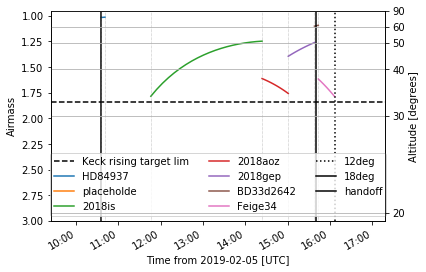

In [28]:
fig = plt.figure()
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = backup_tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(backup_tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(twi12deg-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in backup_tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('backup_schedule.pdf')

In [29]:
backup_tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,object
HD84937,09:48:56.09,+13:44:39.3,8.3,1x10,1.0,10.0,2019-02-05 10:36:00.000
placeholde,00:00:00.00,00:00:00.0,99,1x3600,1.0,3600.0,2019-02-05 10:41:10.000
2018is,13:16:57.35,-16:37:04.4,22,7x1200,7.0,1200.0,2019-02-05 11:46:10.000
2018aoz,11:51:01.79,-28:44:38.4,20,2x900,2.0,900.0,2019-02-05 14:23:52.000
2018gep,16:43:48.20,+41:02:43.3,19.75,2x900,2.0,900.0,2019-02-05 15:00:59.000
BD33d2642,15:51:59.86,+32:56:54.8,10.81,1x30,1.0,30.0,2019-02-05 15:38:06.000
Feige34,10:39:36.74,+43:06:09.3,11.3,1x60,1.0,60.0,2019-02-05 15:43:36.000


In [30]:
twi18deg.iso

'2019-02-05 15:40:36.422'

In [32]:
pre_twi18deg.iso

'2019-02-05 05:30:59.907'